In [61]:
import numpy as np
import pandas as pd

# Data Visualisation

import matplotlib.pyplot as plt 
import seaborn as sns

In [65]:
Datos2 = pd.DataFrame(pd.read_csv('test.csv'))
# regresion lineal  Datos2=pd.read_csv('./Carv32.csv')

In [67]:
Datos2.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [68]:
Datos2.head(100)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
95,987,3,"Tenglin, Mr. Gunnar Isidor",male,25.0,0,0,350033,7.7958,NaN,S
96,988,1,"Cavendish, Mrs. Tyrell William (Julia Florence...",female,76.0,1,0,19877,78.8500,C46,S
97,989,3,"Makinen, Mr. Kalle Edvard",male,29.0,0,0,STON/O 2. 3101268,7.9250,NaN,S
98,990,3,"Braf, Miss. Elin Ester Maria",female,20.0,0,0,347471,7.8542,NaN,S


In [69]:
Datos2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


In [70]:
Datos2_sin_na = Datos2.dropna()

In [71]:
print("Cantidad de filas con valores NaN después de eliminarlas:", Datos2_sin_na.isnull().sum())

Cantidad de filas con valores NaN después de eliminarlas: PassengerId    0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64


In [72]:
Datos2.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


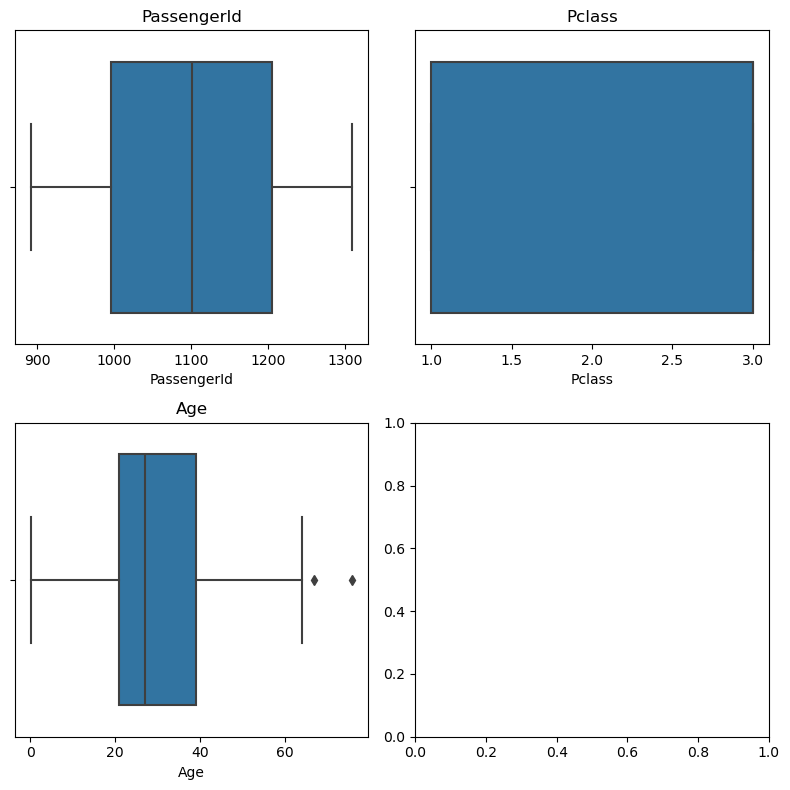

In [73]:
fig, axs = plt.subplots(2,2, figsize = (8,8))
titulos = ['PassengerId', 'Pclass', 'Age']
#plt1 = sns.boxplot(Datos2['PassengerId'], ax = axs[0,0]).
#plt2 = sns.boxplot(Datos2['Pclass'], ax = axs[0,1])
#plt3 = sns.boxplot(Datos2['Age'], ax = axs[1,0])

sns.boxplot(x=Datos2['PassengerId'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=Datos2['Pclass'], ax=axs[0, 1]).set(title=titulos[1])
sns.boxplot(x=Datos2['Age'], ax=axs[1, 0]).set(title=titulos[2])


plt.tight_layout()
plt.show()

In [74]:
nivel_min=2
nivel_max=8
Total_atipicos=((Datos2['Age']<nivel_min)|(Datos2['Age']>nivel_max)).sum()
print("El total de Datos Atipicos es:{}".format(Total_atipicos))

El total de Datos Atipicos es:322


In [75]:
Datos2_sin_atipicos = Datos2[(Datos2['Age'] >= nivel_min) & (Datos2['Age'] <= nivel_max)]

# Verificar la cantidad de filas antes y después de eliminar los atípicos
print("Cantidad de filas antes de eliminar los atípicos:", len(Datos2))
print("Cantidad de filas después de eliminar los atípicos:", len(Datos2_sin_atipicos))

Cantidad de filas antes de eliminar los atípicos: 418
Cantidad de filas después de eliminar los atípicos: 10


In [76]:
Datos2_sin_atipicos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
80,972,3,"Boulos, Master. Akar",male,6.0,1,1,2678,15.2458,NaN,C
89,981,2,"Wells, Master. Ralph Lester",male,2.0,1,1,29103,23.0000,NaN,S
161,1053,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S
196,1088,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C


In [77]:
Datos= Datos2_sin_atipicos.copy()

In [78]:
Datos.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
80,972,3,"Boulos, Master. Akar",male,6.0,1,1,2678,15.2458,NaN,C
89,981,2,"Wells, Master. Ralph Lester",male,2.0,1,1,29103,23.0000,NaN,S
161,1053,3,"Touma, Master. Georges Youssef",male,7.0,1,1,2650,15.2458,NaN,C
194,1086,2,"Drew, Master. Marshall Brines",male,8.0,0,2,28220,32.5000,NaN,S
196,1088,1,"Spedden, Master. Robert Douglas",male,6.0,0,2,16966,134.5000,E34,C


In [79]:
print(Datos.dtypes)

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object


In [80]:
Datos2 = Datos.select_dtypes(include=['float64'])

# Verificar las primeras filas del nuevo DataFrame
print(Datos2.head())

     Age      Fare
80   6.0   15.2458
89   2.0   23.0000
161  7.0   15.2458
194  8.0   32.5000
196  6.0  134.5000


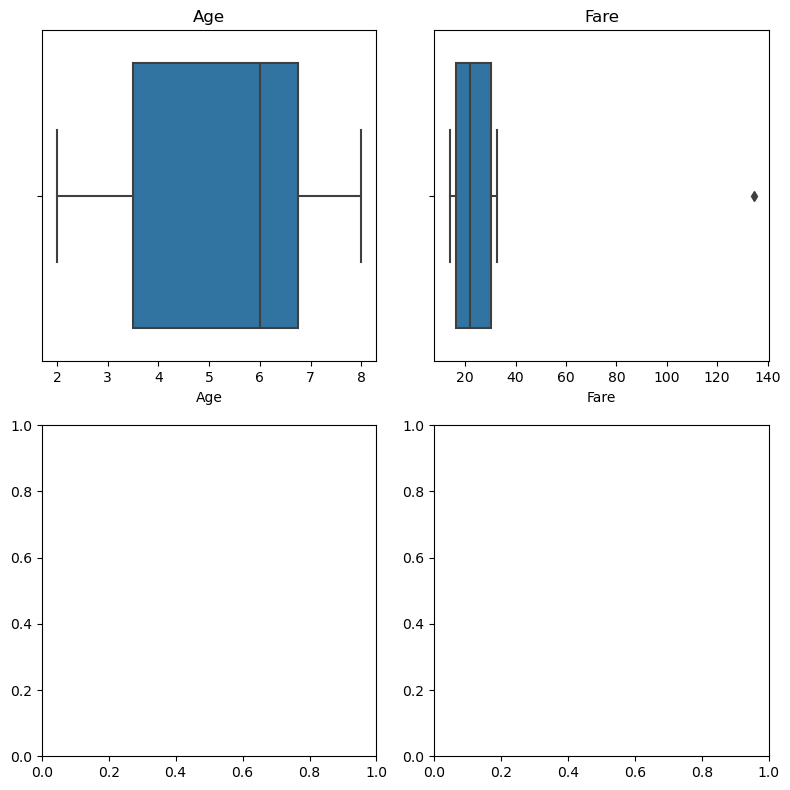

In [81]:
fig, axs = plt.subplots(2,2, figsize = (8,8))
titulos = ['Age', 'Fare']
sns.boxplot(x=Datos2['Age'], ax=axs[0, 0]).set(title=titulos[0])
sns.boxplot(x=Datos2['Fare'], ax=axs[0, 1]).set(title=titulos[1])

plt.tight_layout()
plt.show()

C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Lenovo\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


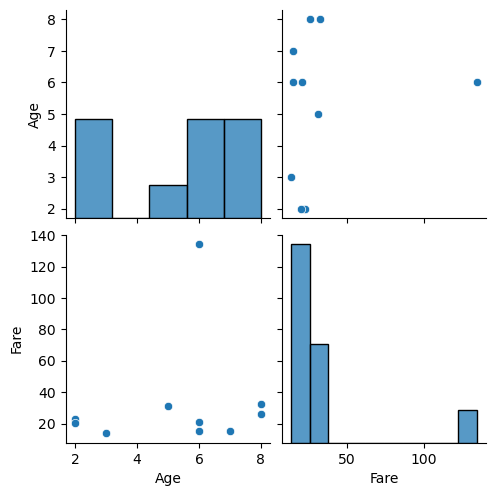

In [82]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.pairplot(Datos2)
plt.show()

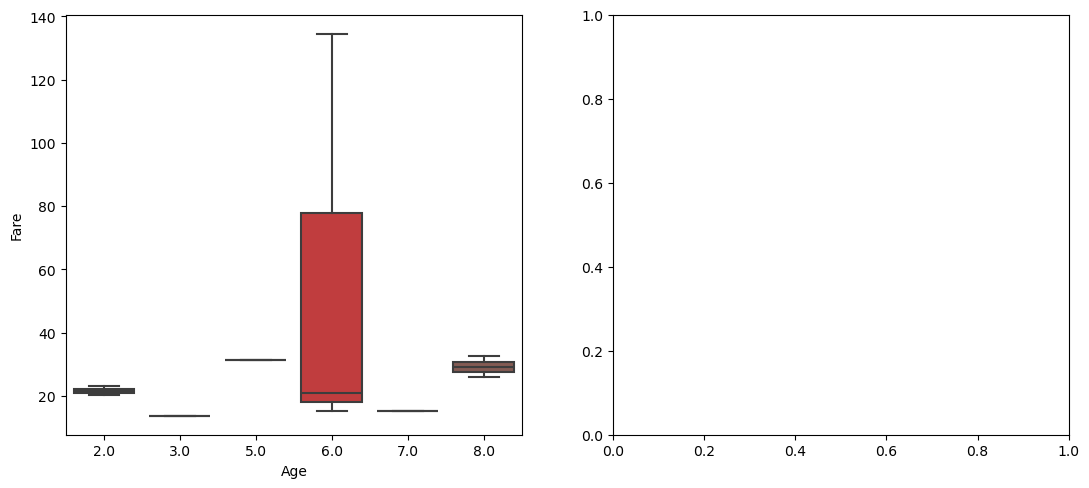

In [84]:
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.boxplot(x = 'Age', y = 'Fare', data = Datos2)
plt.subplot(2,3,2)
plt.show()

In [86]:
from sklearn.model_selection import train_test_split

# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(Datos2, train_size = 0.7, test_size = 0.3, random_state = 100)

In [87]:
df_train.describe()

,Age,Fare
count,7.000000,7.000000
mean,6.285714,36.905943
std,1.704336,43.564004
min,3.000000,13.775000
25%,6.000000,15.245800
50%,6.000000,21.075000
75%,7.500000,29.250000
max,8.000000,134.500000


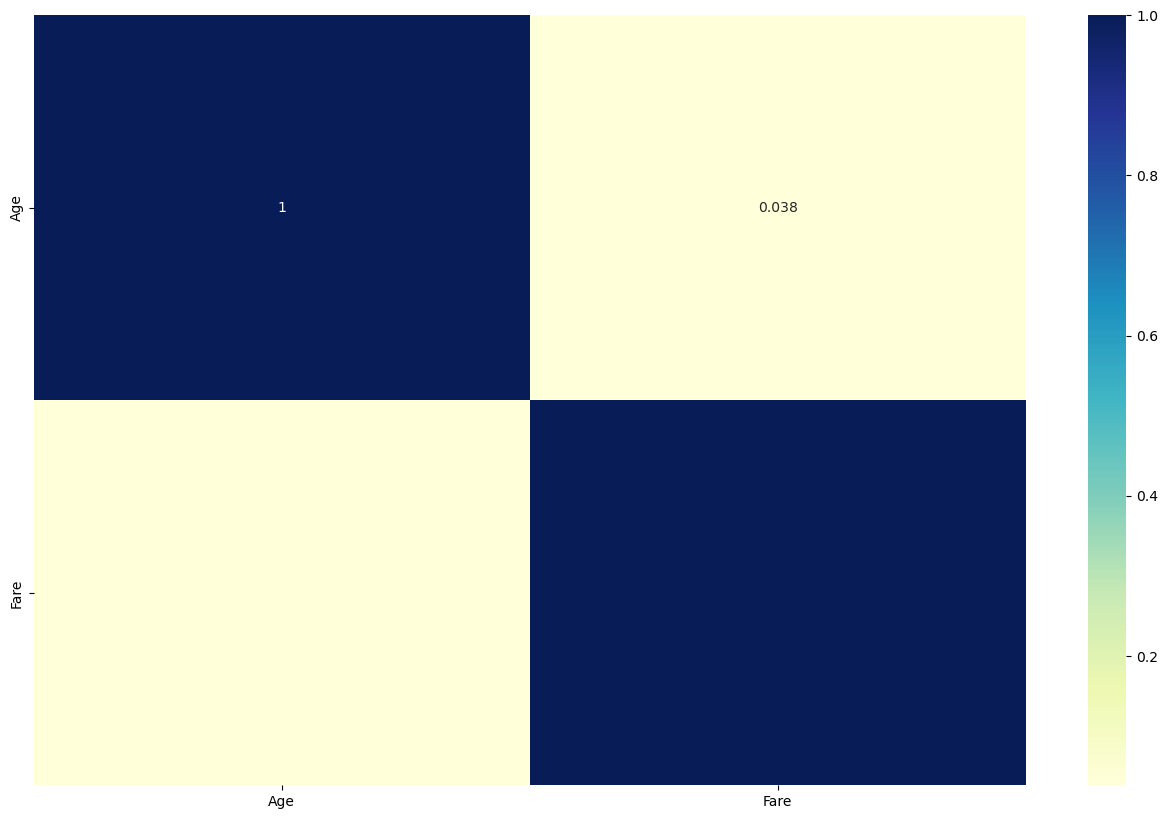

In [88]:
plt.figure(figsize = (16, 10))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

In [89]:
y_train = df_train.pop('Age')
X_train = df_train

In [90]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [91]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

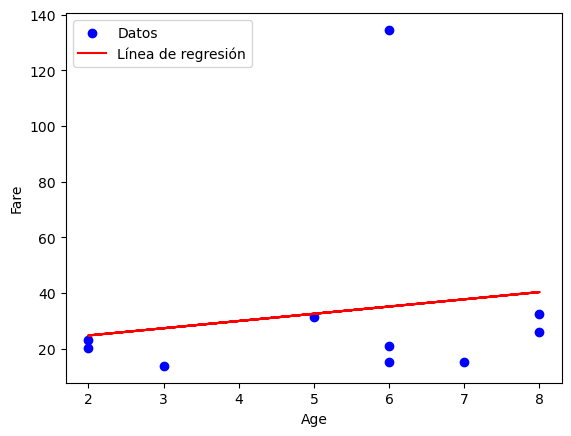

In [100]:
X = Datos2[['Age']]
y = Datos2['Fare']

# Crear y entrenar el modelo de regresión lineal
modelo = LinearRegression()
modelo.fit(X, y)

# Predecimos los valores de y para los datos de X
y_pred = modelo.predict(X)

# Graficar los puntos de datos
plt.scatter(X, y, color='blue', label='Datos')

# Graficar la línea de regresión
plt.plot(X, y_pred, color='red', label='Línea de regresión')

# Establecer las etiquetas de los ejes
plt.xlabel('Age')
plt.ylabel('Fare')

# Mostrar la leyenda del gráfico
plt.legend()

# Función para mostrar el gráfico
plt.show()

Analisis
Edad (Age):

La edad promedio de los pasajeros es de aproximadamente 6.29 años
La mayoría de los pasajeros tienen entre 3 y 8 años, ya que el 75% de las edades están por debajo de 7.5 años.
La dispersión de las edades es relativamente baja, ya que la desviación estándar es de aproximadamente 1.70.
Parece haber una variación relativamente pequeña en las edades de los pasajeros, con la mayoría concentrada entre 3 y 8 años.
Tarifa (Fare):

La tarifa promedio pagada por los pasajeros es de aproximadamente 36.91 unidades monetarias.
La dispersión de las tarifas es bastante alta, con una desviación estándar de aproximadamente 43.56.
Las tarifas varían ampliamente, desde 13.775 hasta 134.5 unidades monetarias.
La mayoría de las tarifas parecen estar en el rango más bajo, ya que el 75% de las tarifas son menores o iguales a 29.25 unidades monetarias.
En resumen, parece que la mayoría de los pasajeros en este conjunto de datos del Titanic son niños (entre 3 y 8 años), y las tarifas pagadas por sus boletos varían ampliamente, aunque la mayoría parece haber pagado tarifas más bajas 